In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#Read CSV document with an encoding because 'UTF-8' codec can't decode (UnicodeDecodeError)

df = pd.read_csv('superstore_final_dataset.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [75]:
#Transform data types into corresponding ones



#Dates
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%d/%m/%Y")

#String
df['Postal Code'] = df['Postal Code'].astype(str)

#Int
df['Sales'] = df['Sales'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [77]:
df['Row ID'] = df.index

In [79]:
#Split Mastertable intro four tables following ERD

df=df.drop_duplicates().reset_index(drop=True)

Order_Dim = df[['Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Sales']]
Customer_Dim = df[['Customer ID', 'Customer Name', 'Segment']]
Product_Dim = df[['Product ID', 'Product Name', 'Category', 'Sub-Category']]

Delivery_Dim = df[['Order Date', 'Ship Date', 'Ship Mode']].reset_index(drop=True)
Delivery_Dim['Delivery ID'] = Delivery_Dim.index
Delivery_Dim = Delivery_Dim[['Delivery ID', 'Order Date', 'Ship Date', 'Ship Mode']]

Destination_Dim = df[['Country', 'City', 'State', 'Postal Code', 'Region']].reset_index(drop=True)
Destination_Dim['Destination ID'] = Destination_Dim.index
Destination_Dim = Destination_Dim[['Destination ID', 'Country', 'City', 'State', 'Postal Code', 'Region']]


In [109]:
Customer_Dim.head()

,Customer ID,Customer Name,Segment
0,CG-12520,Claire Gute,Consumer
1,CG-12520,Claire Gute,Consumer
2,DV-13045,Darrin Van Huff,Corporate
3,SO-20335,Sean O'Donnell,Consumer
4,SO-20335,Sean O'Donnell,Consumer


In [83]:
Product_Dim.head()

,Product ID,Product Name,Category,Sub-Category
0,FUR-BO-10001798,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Office Supplies,Storage


In [97]:
#Creating the ID relation with the other tables, ensuring that there are no redundancies. (Delivery-Destination)

Delivery_Dim_mrg = Delivery_Dim.merge(Destination_Dim, left_on ='Delivery ID', right_on='Destination ID')
merged_df = pd.merge(Delivery_Dim_mrg, Destination_Dim.drop_duplicates(subset=['Country', 'City', 'State', 'Postal Code', 'Region']), on=['Country', 'City', 'State', 'Postal Code', 'Region'], how='left')

merged_df = merged_df.rename(columns={'Destination ID_y': 'Destination ID'})

Delivery_DimNew = merged_df[['Delivery ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Destination ID']].reset_index(drop=True)
Destination_DimNew = merged_df[['Destination ID', 'Country', 'City', 'State', 'Postal Code', 'Region']].drop_duplicates().reset_index(drop=True)


In [99]:
Delivery_DimNew.head()

,Delivery ID,Order Date,Ship Date,Ship Mode,Destination ID
0,0,2017-11-08,2017-11-11,Second Class,0
1,1,2017-11-08,2017-11-11,Second Class,0
2,2,2017-06-12,2017-06-16,Second Class,2
3,3,2016-10-11,2016-10-18,Standard Class,3
4,4,2016-10-11,2016-10-18,Standard Class,3


In [101]:
Destination_DimNew.head()

,Destination ID,Country,City,State,Postal Code,Region
0,0,United States,Henderson,Kentucky,42420.0,South
1,2,United States,Los Angeles,California,90036.0,West
2,3,United States,Fort Lauderdale,Florida,33311.0,South
3,5,United States,Los Angeles,California,90032.0,West
4,12,United States,Concord,North Carolina,28027.0,South


In [105]:
#Creating the ID relation with the other tables, ensuring that there are no redundancies. (Order-Delivery)

Order_Dim_mrg = Order_Dim.merge(Delivery_DimNew, left_on='Row ID', right_on='Delivery ID')
merged_ord = pd.merge(Order_Dim_mrg, Delivery_DimNew.drop_duplicates(subset=['Order Date', 'Ship Date', 'Ship Mode', 'Destination ID']), on=['Order Date', 'Ship Date', 'Ship Mode', 'Destination ID'], how='left')

merged_ord = merged_ord.rename(columns={'Delivery ID_y': 'Delivery ID'})

Order_DimNew = merged_ord[['Row ID', 'Order ID', 'Customer ID', 'Product ID', 'Delivery ID', 'Sales']]
Delivery_DimNew =merged_ord[['Delivery ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Destination ID']]


In [107]:
Delivery_DimNew.head()

,Delivery ID,Order Date,Ship Date,Ship Mode,Destination ID
0,0,2017-11-08,2017-11-11,Second Class,0
1,0,2017-11-08,2017-11-11,Second Class,0
2,2,2017-06-12,2017-06-16,Second Class,2
3,3,2016-10-11,2016-10-18,Standard Class,3
4,3,2016-10-11,2016-10-18,Standard Class,3


In [49]:
Order_DimNew.head()

,Row_ID,Order_ID,Customer_ID,Product_ID,Delivery_ID,Sales
0,0,CA-2017-152156,CG-12520,FUR-BO-10001798,0,261.96
1,1,CA-2017-152156,CG-12520,FUR-CH-10000454,0,731.94
2,2,CA-2017-138688,DV-13045,OFF-LA-10000240,2,14.62
3,3,US-2016-108966,SO-20335,FUR-TA-10000577,3,9.575.775
4,4,US-2016-108966,SO-20335,OFF-ST-10000760,3,22.368


In [111]:
#Clean all tables of redundancies now that all IDs are related.

Customer_Dim = Customer_Dim.drop_duplicates().reset_index(drop=True)
Product_Dim = Product_Dim.drop_duplicates().reset_index(drop=True)
Delivery_DimNew = Delivery_DimNew.drop_duplicates().reset_index(drop=True)
Destination_DimNew = Destination_DimNew.drop_duplicates().reset_index(drop=True)


In [113]:
#Save the four tables on a folder.

Order_DimNew.to_csv('Tables/order_dim.csv', header=True, index=False)
Customer_Dim.to_csv('Tables/customer_dim.csv', header=True, index=False)
Product_Dim.to_csv('Tables/product_dim.csv', header=True, index=False)
Delivery_DimNew.to_csv('Tables/delivery_dim.csv', header=True, index=False)
Destination_DimNew.to_csv('Tables/destination_dim.csv', header=True, index=False)

In [115]:
dfs= pd.read_csv('Tables/product_dim.csv')
dfs

,Product ID,Product Name,Category,Sub-Category
0,FUR-BO-10001798,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Office Supplies,Storage
...,...,...,...,...
1888,TEC-AC-10002380,Sony 8GB Class 10 Micro SDHC R40 Memory Card,Technology,Accessories
1889,TEC-PH-10002817,RCA ViSYS 25425RE1 Corded phone,Technology,Phones
1890,TEC-MA-10003589,Cisco 8961 IP Phone Charcoal,Technology,Machines
1891,OFF-AP-10003099,"Eureka Hand Vacuum, Bagless",Office Supplies,Appliances


In [55]:
#Customer_Dim #-- 793 rows x 3 columns
#Product_Dim #-- 1894 rows x 4 columns
#Delivery_DimNew #-- 4906 rows x 5 columns
#Destination_DimNew #-- 628 rows x 6 columns
#Order_DimNew  #-- 9800 rows x 6 columns

Text(0.5, 1.0, 'Top 20 States by Sales')

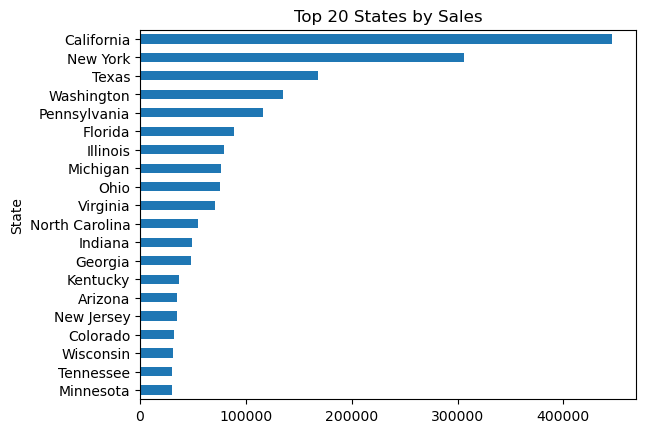

In [147]:
df.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh()
plt.title('Top 20 States by Sales')

Text(0.5, 1.0, 'Top 20 Cities by Sales')

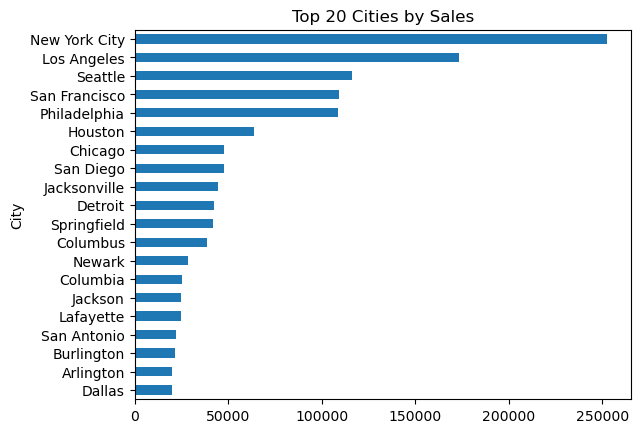

In [149]:
df.groupby('City')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh()
plt.title('Top 20 Cities by Sales')

Text(0.5, 1.0, 'Composition of Category for Sales')

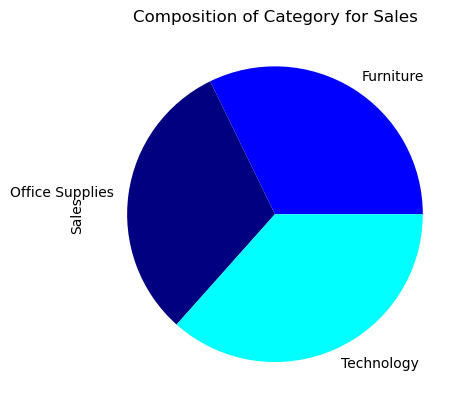

In [129]:
colors= ['blue', 'navy', 'cyan']

df.groupby('Category')['Sales'].sum().plot.pie(colors=colors)
plt.title("Composition of Category for Sales")